<a href="https://colab.research.google.com/github/mujtaba-ssj/PySpark/blob/main/Module4_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LOADING FILES

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
#library
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#upload data to directory
from google.colab import files
upload = files.upload()

Saving Fish.csv to Fish.csv


In [5]:
#1. READ THE DATASET
dataset = spark.read.csv('Fish.csv', inferSchema=True, header = True)

In [6]:
dataset.show()

+-------+------+-------+-------+-------+-------+------+
|Species|Weight|Length1|Length2|Length3| Height| Width|
+-------+------+-------+-------+-------+-------+------+
|  Bream| 242.0|   23.2|   25.4|   30.0|  11.52|  4.02|
|  Bream| 290.0|   24.0|   26.3|   31.2|  12.48|4.3056|
|  Bream| 340.0|   23.9|   26.5|   31.1|12.3778|4.6961|
|  Bream| 363.0|   26.3|   29.0|   33.5|  12.73|4.4555|
|  Bream| 430.0|   26.5|   29.0|   34.0| 12.444| 5.134|
|  Bream| 450.0|   26.8|   29.7|   34.7|13.6024|4.9274|
|  Bream| 500.0|   26.8|   29.7|   34.5|14.1795|5.2785|
|  Bream| 390.0|   27.6|   30.0|   35.0|  12.67|  4.69|
|  Bream| 450.0|   27.6|   30.0|   35.1|14.0049|4.8438|
|  Bream| 500.0|   28.5|   30.7|   36.2|14.2266|4.9594|
|  Bream| 475.0|   28.4|   31.0|   36.2|14.2628|5.1042|
|  Bream| 500.0|   28.7|   31.0|   36.2|14.3714|4.8146|
|  Bream| 500.0|   29.1|   31.5|   36.4|13.7592| 4.368|
|  Bream| 340.0|   29.5|   32.0|   37.3|13.9129|5.0728|
|  Bream| 600.0|   29.4|   32.0|   37.2|14.9544|

In [7]:
row = dataset.count()
row

159

In [8]:
dataset.printSchema()

root
 |-- Species: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Length1: double (nullable = true)
 |-- Length2: double (nullable = true)
 |-- Length3: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Width: double (nullable = true)



In [10]:
db = dataset.toPandas()
db.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [14]:
db.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
#combine columns

only_features=['Length1','Length2','Length3','Height','Width']

In [ ]:
assembler = VectorAssembler(inputCols=only_features, outputCol='features')

In [ ]:
feat_df = assembler.transform(dataset).select('features')

In [ ]:
feat_df.show(6)

+--------------------+
|            features|
+--------------------+
|[23.2,25.4,30.0,1...|
|[24.0,26.3,31.2,1...|
|[23.9,26.5,31.1,1...|
|[26.3,29.0,33.5,1...|
|[26.5,29.0,34.0,1...|
|[26.8,29.7,34.7,1...|
+--------------------+
only showing top 6 rows



In [ ]:
#standardize dataset

scaler = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledfeatures',
    withMean = True,
    withStd = True).fit(feat_df)

    #when we transform the dtaframe the old features will remain
df_scaled = scaler.transform(feat_df)
df_scaled.show(6)

+--------------------+--------------------+
|            features|      scaledfeatures|
+--------------------+--------------------+
|[23.2,25.4,30.0,1...|[-0.3048254620958...|
|[24.0,26.3,31.2,1...|[-0.2247969816446...|
|[23.9,26.5,31.1,1...|[-0.2348005417010...|
|[26.3,29.0,33.5,1...|[0.00528489965243...|
|[26.5,29.0,34.0,1...|[0.02529201976522...|
|[26.8,29.7,34.7,1...|[0.05530269993441...|
+--------------------+--------------------+
only showing top 6 rows



In [ ]:
#fit for pca model

n_components = 2
pca = PCA(
    k = n_components,
    inputCol = 'scaledfeatures',
    outputCol = 'pcaFeatures').fit(df_scaled)

df_pca = pca.transform(df_scaled)
print("Explained Variance ratio", pca.explainedVariance.toArray())
df_pca.show(6)

Explained Variance ratio [0.8738777  0.10194308]
+--------------------+--------------------+--------------------+
|            features|      scaledfeatures|         pcaFeatures|
+--------------------+--------------------+--------------------+
|[23.2,25.4,30.0,1...|[-0.3048254620958...|[0.20300360785698...|
|[24.0,26.3,31.2,1...|[-0.2247969816446...|[-0.0831602382970...|
|[23.9,26.5,31.1,1...|[-0.2348005417010...|[-0.1787488997886...|
|[26.3,29.0,33.5,1...|[0.00528489965243...|[-0.4624331580772...|
|[26.5,29.0,34.0,1...|[0.02529201976522...|[-0.6484654617791...|
|[26.8,29.7,34.7,1...|[0.05530269993441...|[-0.7681837406117...|
+--------------------+--------------------+--------------------+
only showing top 6 rows



In [ ]:
X_pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
X_pca = np.array(X_pca)
X_pca

array([[ 2.03003608e-01,  6.67518798e-01],
       [-8.31602383e-02,  8.12185205e-01],
       [-1.78748900e-01,  8.36862666e-01],
       [-4.62433158e-01,  6.77837698e-01],
       [-6.48465462e-01,  6.85001485e-01],
       [-7.68183741e-01,  8.43328758e-01],
       [-9.05165506e-01,  1.00018763e+00],
       [-6.84397802e-01,  5.92091238e-01],
       [-8.47669214e-01,  8.68496844e-01],
       [-1.01491214e+00,  8.53721689e-01],
       [-1.06530179e+00,  8.72122996e-01],
       [-1.01121038e+00,  8.49346621e-01],
       [-8.85781924e-01,  6.45910831e-01],
       [-1.16492013e+00,  7.13002322e-01],
       [-1.27456507e+00,  9.32723347e-01],
       [-1.42695266e+00,  1.07452757e+00],
       [-1.43129036e+00,  8.43902250e-01],
       [-1.42270524e+00,  8.45271820e-01],
       [-1.51600869e+00,  9.39542469e-01],
       [-1.58130898e+00,  7.77155603e-01],
       [-1.66486008e+00,  8.47038195e-01],
       [-1.68047050e+00,  9.94542035e-01],
       [-1.66125438e+00,  8.65015851e-01],
       [-1.

In [ ]:
#convert array to datafram
df_pca = pd.DataFrame(X_pca, columns = ['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,0.203004,0.667519
1,-0.083160,0.812185
2,-0.178749,0.836863
3,-0.462433,0.677838
4,-0.648465,0.685001


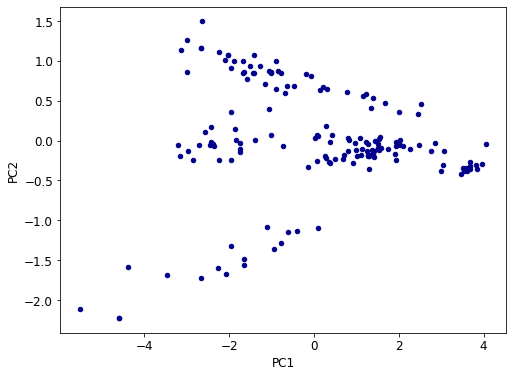

In [ ]:
#plot two principal complonents

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
ax1 = df_pca.plot.scatter(x='PC1',y='PC2',c='DarkBlue')

In [ ]:
#Linear Regression

output = assembler.transform(dataset)

#input vs output
finalized_data = output.select('features','Weight')

finalized_data.show()

+--------------------+------+
|            features|Weight|
+--------------------+------+
|[23.2,25.4,30.0,1...| 242.0|
|[24.0,26.3,31.2,1...| 290.0|
|[23.9,26.5,31.1,1...| 340.0|
|[26.3,29.0,33.5,1...| 363.0|
|[26.5,29.0,34.0,1...| 430.0|
|[26.8,29.7,34.7,1...| 450.0|
|[26.8,29.7,34.5,1...| 500.0|
|[27.6,30.0,35.0,1...| 390.0|
|[27.6,30.0,35.1,1...| 450.0|
|[28.5,30.7,36.2,1...| 500.0|
|[28.4,31.0,36.2,1...| 475.0|
|[28.7,31.0,36.2,1...| 500.0|
|[29.1,31.5,36.4,1...| 500.0|
|[29.5,32.0,37.3,1...| 340.0|
|[29.4,32.0,37.2,1...| 600.0|
|[29.4,32.0,37.2,1...| 600.0|
|[30.4,33.0,38.3,1...| 700.0|
|[30.4,33.0,38.5,1...| 700.0|
|[30.9,33.5,38.6,1...| 610.0|
|[31.0,33.5,38.7,1...| 650.0|
+--------------------+------+
only showing top 20 rows



In [ ]:
#split train & test data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])

In [ ]:
#train model

regressor = LinearRegression(featuresCol='features', labelCol='Weight')

#learn to fit the model from train set
regressor = regressor.fit(train_data)

In [ ]:
#model coefficient

coeff = regressor.coefficients

#x & Yintercept

intr = regressor.intercept

print("The coefficient of the model is : %a" %coeff)
print("The intercept of the model is : %f" %intr)


The coefficient of the model is : DenseVector([69.8089, -15.2737, -26.1649, 25.6866, 24.1286])
The intercept of the model is : -516.371145


In [ ]:
#Evaluate model for test dataset

pred = regressor.evaluate(test_data)
#predict the model

pred.predictions.show()

+--------------------+------+-------------------+
|            features|Weight|         prediction|
+--------------------+------+-------------------+
|[10.0,10.5,11.6,1...|   7.5|-203.52512201628747|
|[11.3,11.8,13.1,2...|   9.9|-165.52069891282457|
|[12.5,13.7,14.7,3...|  32.0| -98.77264373773511|
|[13.8,15.0,16.0,3...|  40.0| -43.84508282741041|
|[13.8,15.0,16.2,2...|  19.9|  -85.3236883644231|
|[16.3,17.7,19.8,7...|  90.0|  87.81558184251196|
|[17.8,19.6,20.8,5...|  85.0|  87.87511923330544|
|[19.0,21.0,22.5,5...| 110.0|  132.5393157199162|
|[20.4,22.0,24.7,5...| 150.0|  165.1235113238822|
|[20.5,22.0,24.3,6...| 145.0| 198.88985430949208|
|[20.5,22.5,24.0,5...| 130.0| 180.95947242037857|
|[20.5,22.5,25.3,7...| 160.0| 181.92498389127252|
|[21.1,22.5,25.0,6...| 160.0|  214.9000852603965|
|[21.2,23.0,25.8,1...| 200.0|  291.3753054826892|
|[22.0,24.0,25.5,7...| 225.0|  262.8153848712118|
|[23.0,25.0,28.0,1...| 273.0|  359.5772382050236|
|[25.2,27.3,28.7,8...| 300.0| 412.65546488087614|


In [ ]:
#calculate model statistics

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="Weight", predictionCol='prediction', metricName='rmse')

#root mean square error
rmse = eval.evaluate(pred.predictions)
print("rmse: %.3f" % rmse)

#mean square error
mse = eval.evaluate(pred.predictions,{eval.metricName: "mse"})
print("MSE: %.3f" % mse)

#mean absolute error
mae = eval.evaluate(pred.predictions,{eval.metricName: "mae"})
print("MAE: %.3f" % mae)

#r2 - coefficient
r2 = eval.evaluate(pred.predictions,{eval.metricName: "r2"})
print("r2: %.3f" % r2)

rmse: 103.558
MSE: 10724.280
MAE: 81.318
r2: 0.861
